<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Try_Out_Modul_3_Gusti_Kresna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

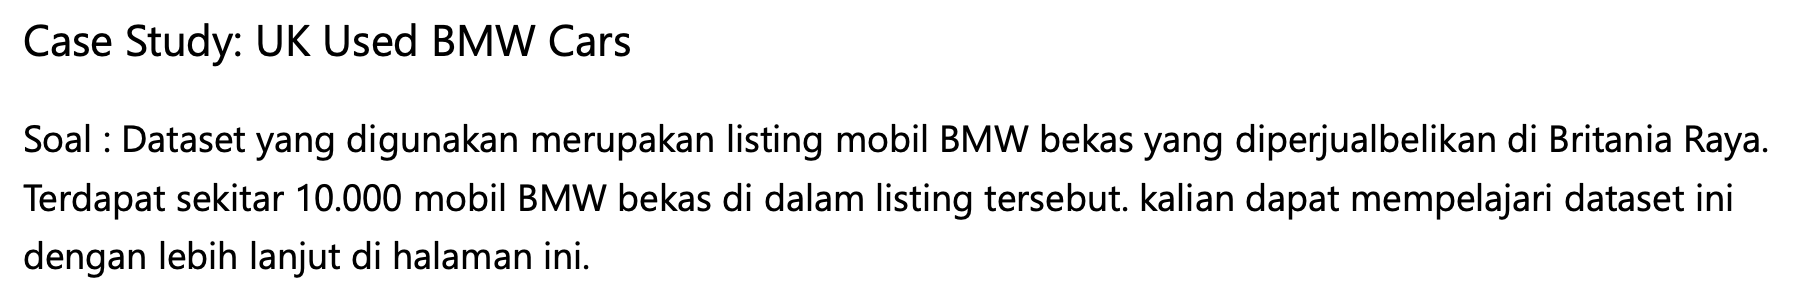

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bmw.csv to bmw.csv


In [ ]:
bmw = pd.read_csv('bmw.csv')

## EDA

In [ ]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [ ]:
bmw['model'].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 X6           106
 7 Series     106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

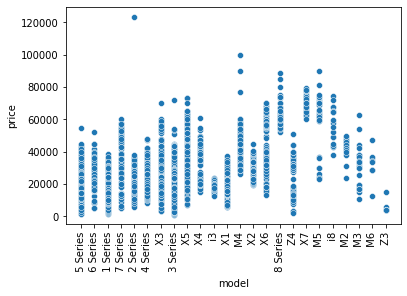

In [ ]:
sns.scatterplot(x='model', y='price', data=bmw)
plt.xticks(rotation=90)
plt.show()

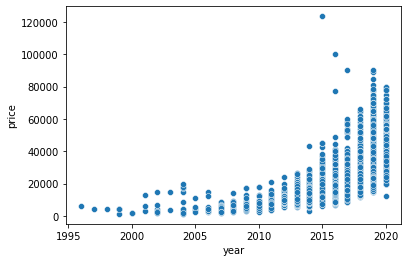

In [ ]:
sns.scatterplot(x='year', y='price', data=bmw)
plt.show()

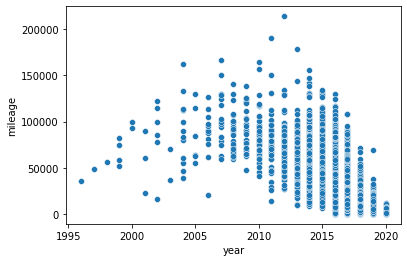

In [ ]:
sns.scatterplot(x='year', y='mileage', data=bmw)
plt.show()

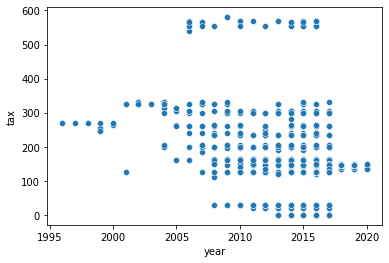

In [ ]:
sns.scatterplot(x='year', y='tax', data=bmw)
plt.show()

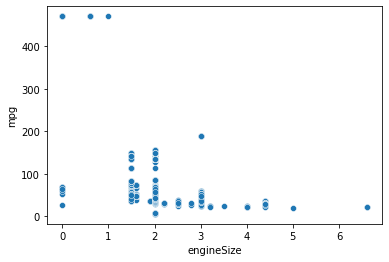

In [ ]:
sns.scatterplot(x='engineSize', y='mpg', data=bmw)
plt.show()

In [ ]:
bmw.shape

(10781, 9)

In [ ]:
def bmw_model_series(model):
    if model.strip()[0] == 'X':
        return 'X Series'
    elif model.strip()[0] == 'M':
        return 'M Series'
    elif model.strip()[0] == 'Z':
        return 'Z Series'
    elif model.strip()[0] == 'i':
        return 'i Series'
    else:
        return model
    
bmw['model_series'] = bmw['model'].apply(bmw_model_series)

In [ ]:
bmw['model_series'].value_counts()

X Series     2451
 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
M Series      210
Z Series      115
 6 Series     108
 7 Series     106
i Series       60
 8 Series      39
Name: model_series, dtype: int64

In [ ]:
X = bmw.drop('price', axis=1)
y = bmw['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

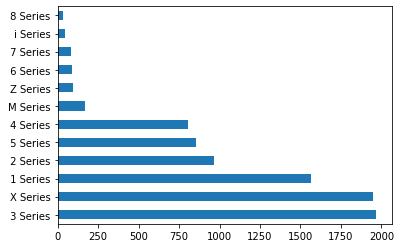

In [ ]:
X_train['model_series'].value_counts().plot(kind='barh')

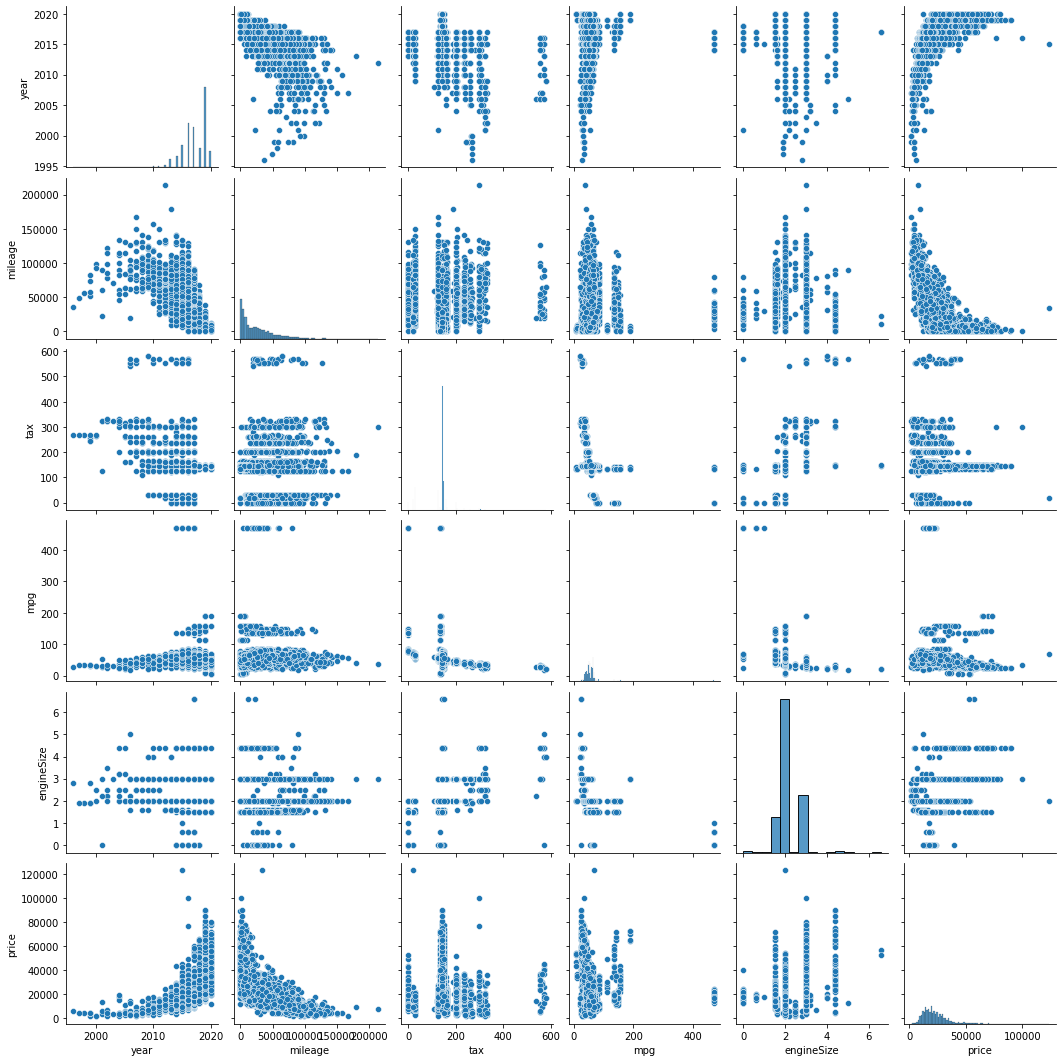

In [ ]:
bmw_train = pd.concat([X_train, y_train], axis=1)
sns.pairplot(bmw_train.drop(['model', 'transmission', 'fuelType'], axis=1))

In [ ]:
bmw_train_short = bmw_train[['year', 'transmission', 'mileage', 'fuelType', 'price']]
bmw_train_short['transmission'] = bmw_train.copy().loc[:, 'transmission'].apply(lambda x: 'Others' if x not in ['Manual', 'Automatic'] else x)
bmw_train_short['fuelType'] = bmw_train.copy().loc[:, 'fuelType'].apply(lambda x: 'Others' if x not in ['Petrol', 'Diesel'] else x)
bmw_train_short

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,transmission,mileage,fuelType,price
4756,2017,Others,18852,Diesel,14951
8276,2015,Automatic,15131,Diesel,18950
8359,2016,Automatic,65392,Diesel,18675
3144,2019,Others,5163,Petrol,25480
10581,2017,Automatic,34544,Diesel,17200
...,...,...,...,...,...
4587,2016,Others,40120,Diesel,21298
6646,2019,Others,6102,Petrol,19980
5478,2019,Automatic,10,Others,39995
8548,2018,Manual,13369,Diesel,13799


## Preprocessing :
 - Encoding by One Hot Encoder since categorical data have no order
 - Scaling by Robust Scaler to accommodate outliers

One Hot Encoding

In [ ]:
onehot = OneHotEncoder(sparse=False)

In [ ]:
onehot_df = pd.DataFrame(onehot.fit_transform(bmw[['model', 'transmission', 'fuelType']]))
onehot_df.columns = onehot.get_feature_names()

Robust Scaling

In [ ]:
remainder = bmw[['year','price','mileage','tax','mpg','engineSize']].copy()

In [ ]:
scaler = RobustScaler()

In [ ]:
scaled = pd.DataFrame(scaler.fit_transform(remainder))
scaled.columns = remainder.columns

In [ ]:
bmw_preprocessed = pd.concat([onehot_df, scaled], axis=1)
bmw_preprocessed.head()

,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,x0_ 6 Series,x0_ 7 Series,x0_ 8 Series,x0_ M2,x0_ M3,x0_ M4,x0_ M5,x0_ M6,x0_ X1,x0_ X2,x0_ X3,x0_ X4,x0_ X5,x0_ X6,x0_ X7,x0_ Z3,x0_ Z4,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol,year,price,mileage,tax,mpg,engineSize
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.713010,1.490988,-2.0,0.250000,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.503310,-0.107721,0.0,-0.610465,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.333333,-0.343495,1.360192,1.5,-0.110465,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,-0.593687,0.254889,0.0,1.110465,-0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.458968,0.648989,1.5,-0.168605,1.0


In [ ]:
bmw_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x0_ 1 Series  10781 non-null  float64
 1   x0_ 2 Series  10781 non-null  float64
 2   x0_ 3 Series  10781 non-null  float64
 3   x0_ 4 Series  10781 non-null  float64
 4   x0_ 5 Series  10781 non-null  float64
 5   x0_ 6 Series  10781 non-null  float64
 6   x0_ 7 Series  10781 non-null  float64
 7   x0_ 8 Series  10781 non-null  float64
 8   x0_ M2        10781 non-null  float64
 9   x0_ M3        10781 non-null  float64
 10  x0_ M4        10781 non-null  float64
 11  x0_ M5        10781 non-null  float64
 12  x0_ M6        10781 non-null  float64
 13  x0_ X1        10781 non-null  float64
 14  x0_ X2        10781 non-null  float64
 15  x0_ X3        10781 non-null  float64
 16  x0_ X4        10781 non-null  float64
 17  x0_ X5        10781 non-null  float64
 18  x0_ X6        10781 non-nu

## SOAL 1
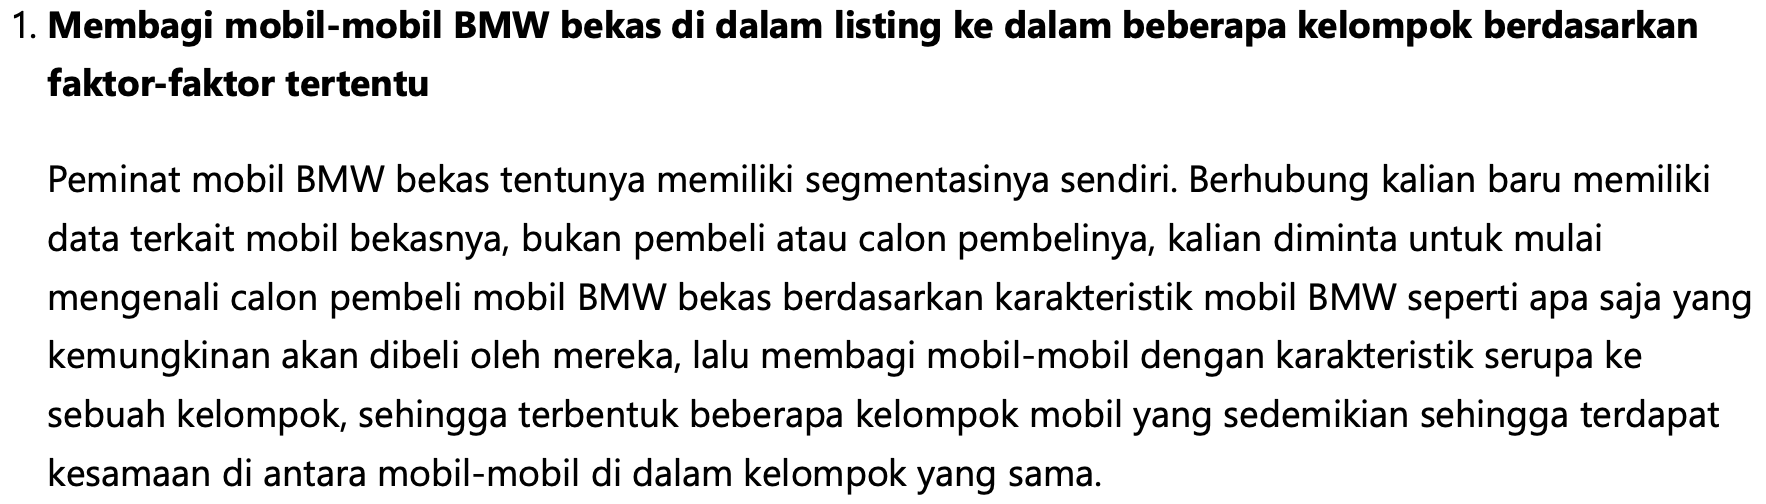

### Unsupervised Learning (kNN)

In [ ]:
#Getting k by silhoutte score
sil_score = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, random_state=2021)
  kmeans.fit(bmw_preprocessed)
  sil_score.append(silhouette_score(bmw_preprocessed, kmeans.labels_, metric='euclidean'))

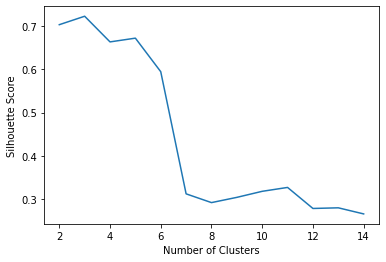

In [ ]:
#Plotting silhoutte score
sns.lineplot(x=range(2,15), y=sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Based on the max silhoutte score, number of cluster is 3.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(bmw_preprocessed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
silhouette_score(bmw_preprocessed, kmeans.labels_, metric='euclidean')

0.721685655602988

Centroid of 3 clusters, indicating the features for each cluster center.

In [ ]:
#Getting centroid for 3 clusters
centroid = pd.DataFrame(kmeans.cluster_centers_)
centroid.columns = bmw_preprocessed.columns
centroid

,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,x0_ 6 Series,x0_ 7 Series,x0_ 8 Series,x0_ M2,x0_ M3,x0_ M4,x0_ M5,x0_ M6,x0_ X1,x0_ X2,x0_ X3,x0_ X4,x0_ X5,x0_ X6,x0_ X7,x0_ Z3,x0_ Z4,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol,year,price,mileage,tax,mpg,engineSize
0,0.143123,0.115706,0.220376,0.097932,0.097816,1.092007e-02,0.011036,4.530669e-03,2.323420e-03,8.131970e-04,1.115242e-02,2.439591e-03,1.161710e-04,0.085502,3.345725e-02,6.342937e-02,2.079461e-02,0.047630,1.068773e-02,6.389405e-03,-6.158268e-17,1.126859e-02,1.394052e-03,1.161710e-03,0.322142,0.180994,0.496863,0.618959,1.161710e-04,2.032993e-02,1.742565e-03,0.358852,0.201402,0.342864,0.055446,0.248257,-0.036694,0.196980
1,0.359427,0.110805,0.278942,0.074972,0.108049,2.445960e-16,0.000551,-1.149254e-16,8.608565e-17,6.114900e-17,-9.887924e-17,9.931292e-17,-2.016616e-17,0.036935,7.181755e-16,1.318390e-15,-7.875645e-16,0.009372,-2.931683e-16,3.556183e-17,-1.409463e-18,2.445960e-16,1.708931e-02,3.858875e-03,0.351709,0.485667,0.162624,0.894157,1.102536e-03,6.780595e-02,1.157663e-02,0.025358,-0.509004,-0.559988,0.848409,-12.329658,1.453367,-0.144487
2,0.236769,0.089136,0.111421,0.044568,0.050139,3.899721e-02,0.027855,2.298509e-17,2.785515e-03,5.571031e-02,8.077994e-02,2.228412e-02,1.949861e-02,0.002786,1.283695e-16,1.392758e-02,4.163336e-17,0.114206,3.899721e-02,-6.071532e-18,1.949861e-02,3.064067e-02,1.647987e-17,1.734723e-18,0.493036,0.245125,0.261838,0.214485,9.757820e-19,-4.163336e-17,1.604619e-17,0.785515,-1.467038,-0.140403,0.954529,16.413649,-1.053103,1.045125


### DBMEANS

In [ ]:
#Optimizing Parameter
epsilon = [i/10 for i in range(5,7)]
min_samples = [i for i in range(2,4)]

In [ ]:
for e in epsilon:
  for s in min_samples:
    dbscan = DBSCAN(eps=e, min_samples=s)
    dbscan.fit(bmw_preprocessed)

    print('\neps ={}.'.format(e))
    print('min_sample ={}'.format(s))

    label = dbscan.fit_predict(bmw_preprocessed)
    print('score = {}'.format(silhouette_score(bmw_preprocessed, label)))

    print('n_cluster = {}'.format(len(np.unique(dbscan.labels_))-1)) #subtract 2 since -1 is noise label from DBSCAN


eps =0.5.
min_sample =2
score = 0.20211474730149967
n_cluster = 669

eps =0.5.
min_sample =3
score = 0.18628021326860345
n_cluster = 476

eps =0.5.
min_sample =4
score = 0.16984899528958458
n_cluster = 377

eps =0.5.
min_sample =5
score = 0.15092222285428114
n_cluster = 314

eps =0.6.
min_sample =2
score = 0.3598964449535893
n_cluster = 436

eps =0.6.
min_sample =3
score = 0.34787411122867207
n_cluster = 331

eps =0.6.
min_sample =4
score = 0.33810184842027036
n_cluster = 276

eps =0.6.
min_sample =5
score = 0.3208476810544169
n_cluster = 248

eps =0.7.
min_sample =2
score = 0.387032324687046
n_cluster = 405

eps =0.7.
min_sample =3
score = 0.3729122001592361
n_cluster = 314

eps =0.7.
min_sample =4
score = 0.36322508688375477
n_cluster = 268

eps =0.7.
min_sample =5
score = 0.349264126113268
n_cluster = 245


The DBSCAN yields worse silhoutte score than KMeans and the number of cluster also much higher that can lead to overfitting

## SOAL 2
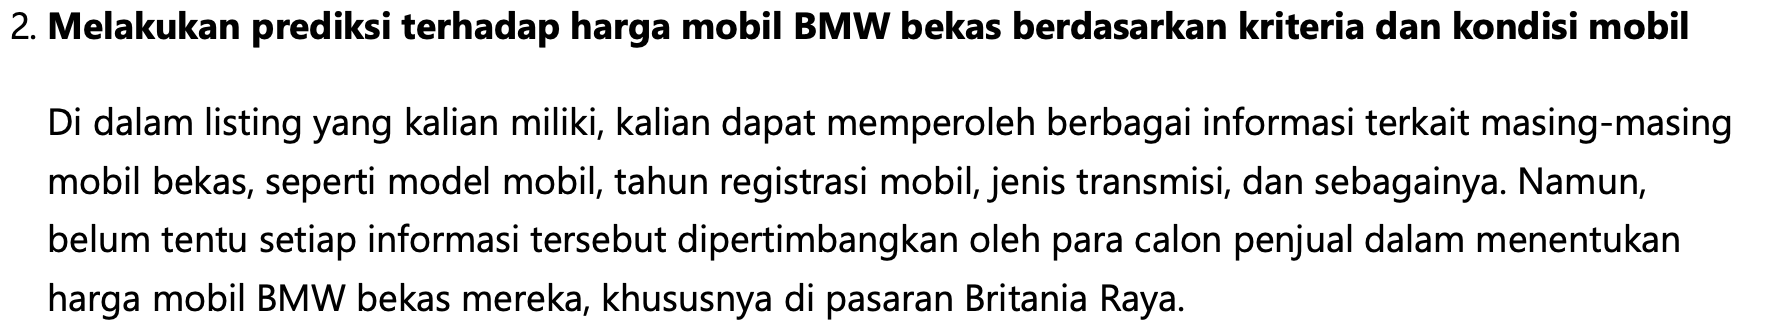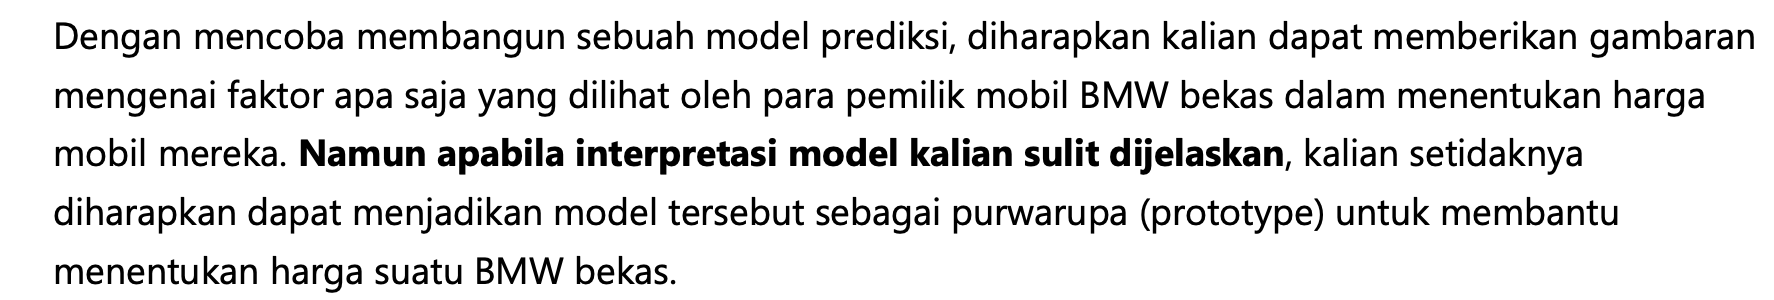

In [ ]:
bmw_preprocessed.head()

,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,x0_ 6 Series,x0_ 7 Series,x0_ 8 Series,x0_ M2,x0_ M3,x0_ M4,x0_ M5,x0_ M6,x0_ X1,x0_ X2,x0_ X3,x0_ X4,x0_ X5,x0_ X6,x0_ X7,x0_ Z3,x0_ Z4,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol,year,price,mileage,tax,mpg,engineSize
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.713010,1.490988,-2.0,0.250000,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.503310,-0.107721,0.0,-0.610465,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.333333,-0.343495,1.360192,1.5,-0.110465,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,-0.593687,0.254889,0.0,1.110465,-0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.458968,0.648989,1.5,-0.168605,1.0


In [ ]:
y = bmw_preprocessed['price'].copy()
X = bmw_preprocessed.drop(['price'], axis=1).copy()

Univariate Feature Selection

Using univariate feature selection since the features may correlate with each other (multicollinearity). e.g : mpg vs engineSize, etc

In [ ]:
selector = SelectPercentile(percentile=50)

In [ ]:
new_X = pd.DataFrame(selector.fit_transform(X, y))

In [ ]:
new_X.columns = X.columns[selector.get_support()]

In [ ]:
new_X.shape

(10781, 18)

In [ ]:
X.shape

(10781, 37)

In [ ]:
new_X.head()

,x0_ 7 Series,x0_ 8 Series,x0_ M4,x0_ M5,x0_ X2,x0_ X4,x0_ X5,x0_ X6,x0_ X7,x0_ Z3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,year,mileage,tax,engineSize
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.000000,1.490988,-2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,-0.107721,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.333333,1.360192,1.5,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.254889,0.0,-0.5
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.000000,0.648989,1.5,1.0


Split train test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=2021)

Build Model & Hyper Parameter Tuning

In [ ]:
model_params = {
    'svm' : {
        'model': SVR(),
        'params' : {
            'C' : [1,10]
        }
    },
    'random_forest' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1]
        }
    }
}

Build Grid Search Cross Validation to find the best estimator and parameters

In [ ]:
scores = []
for model_name, mp in model_params.items():
  grid = GridSearchCV(estimator=mp['model'],param_grid=mp['params'],cv=5, scoring='r2')
  grid.fit(X_train, y_train)

  scores.append({
      'model': model_name,
      'best_score': grid.best_score_,
      'best_params' : grid.best_params_
  })

In [ ]:
pd.DataFrame(scores)

,model,best_score,best_params
0,svm,0.887420,{'C': 10}
1,random_forest,0.878540,{'n_estimators': 10}
2,ridge,0.816963,{'alpha': 0.1}


The best score is achieved by applying SVM with C 10

In [ ]:
svm = SVR(C=10)

In [ ]:
svm.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print('R2:', r2_score(y_test, y_pred))

R2: 0.8771335476305895
